In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from dateutil import parser
import scipy.stats as stats
from functools import reduce

In [2]:
df_cryo_temp=pd.read_excel(io='/exp/sbnd/app/users/abhat/jupyter_notebooks/uboone_resistance/SeeqExport_cryo_temp.xlsx',sheet_name='Grid')
df_resistance=pd.read_csv('/exp/sbnd/app/users/abhat/jupyter_notebooks/uboone_resistance/total_data.csv')
df_level=pd.read_excel(io='/exp/sbnd/app/users/abhat/jupyter_notebooks/uboone_resistance/SeeqExport_level.xlsx',sheet_name='Grid')
df_LArTF = pd.concat(pd.read_excel('/exp/sbnd/app/users/abhat/jupyter_notebooks/uboone_resistance/LArTF AHU-1 May - Oct 2023.xlsx', sheet_name=None), ignore_index=True)

/exp/sbnd/data/users/abhat/conda_libs/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/exp/sbnd/data/users/abhat/conda_libs/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df_cryo_temp.head()

,Date-Time,UBOONE_TE183_F_CV
0,2023-01-01 06:36:04.083,NaN
1,2023-01-01 06:36:32.814,NaN
2,2023-01-01 06:37:01.545,NaN
3,2023-01-01 06:37:30.276,NaN
4,2023-01-01 06:37:59.007,NaN


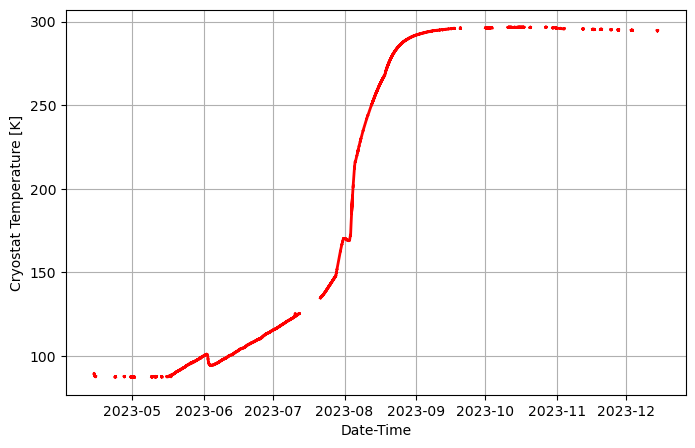

In [4]:
plt.figure(figsize=(8,5))
df_cryo_temp['date-time'] = pd.to_datetime(df_cryo_temp['Date-Time'], errors='coerce')
# print(df_cryo_temp['date-time'])
plt.plot(df_cryo_temp['date-time'],df_cryo_temp['UBOONE_TE183_F_CV'],'-r',lw=2)
plt.grid()
plt.xlabel('Date-Time')
plt.ylabel('Cryostat Temperature [K]')
plt.show()

In [5]:
df_cryo_temp.head()

,Date-Time,UBOONE_TE183_F_CV,date-time
0,2023-01-01 06:36:04.083,NaN,2023-01-01 06:36:04.083
1,2023-01-01 06:36:32.814,NaN,2023-01-01 06:36:32.814
2,2023-01-01 06:37:01.545,NaN,2023-01-01 06:37:01.545
3,2023-01-01 06:37:30.276,NaN,2023-01-01 06:37:30.276
4,2023-01-01 06:37:59.007,NaN,2023-01-01 06:37:59.007


In [6]:
len(df_cryo_temp['date-time'])

1048443

In [7]:
df_level.head()

,Date-Time,UBOONE_LT124_F_CV
0,2023-01-01 23:10:04.340,135.437043
1,2023-01-01 23:10:32.953,135.437132
2,2023-01-01 23:11:01.566,135.439596
3,2023-01-01 23:11:30.180,135.437959
4,2023-01-01 23:11:58.793,135.435902


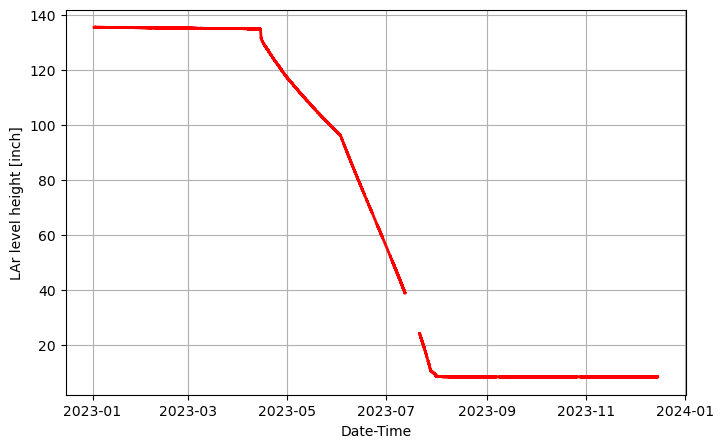

In [8]:
plt.figure(figsize=(8,5))
df_level['date-time'] = pd.to_datetime(df_level['Date-Time'], errors='coerce')
# print(df_cryo_temp['date-time'])
plt.plot(df_level['date-time'],df_level['UBOONE_LT124_F_CV'],'-r',lw=2)
plt.grid()
plt.xlabel('Date-Time')
plt.ylabel('LAr level height [inch]')
plt.show()

In [9]:
len(df_level['date-time'])

1048443

In [10]:
df_resistance[:1]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,61,62,63,64,mytimestamp,avg_res,std,std_err,rol_avg,std0
0,0,1.680908e+09,2173582.0,0.0,2173584.25,0.099,2173583.0,0.198,2173588.75,0.297,...,2173583.5,3.236,2173580.0,3.335,2023-04-07 22:47:48.181544960,2.173582e+06,4.439899,0.784871,NaN,33.442009


In [11]:
df_resistance[-1:]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,61,62,63,64,mytimestamp,avg_res,std,std_err,rol_avg,std0
28630,28726,1.693985e+09,1082818.5,0.0,1082818.5,0.099,1082821.88,0.198,1082824.0,0.297,...,1082826.87,3.234,1082825.88,3.333,2023-09-06 07:31:37.635229952,1.082826e+06,3.384638,0.598325,1.086778e+06,33.442009


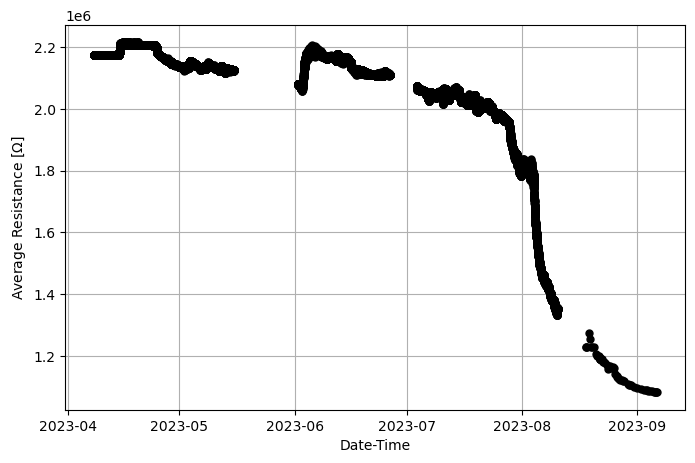

In [12]:
plt.figure(figsize=(8,5))

df_resistance['date-time'] = pd.to_datetime(df_resistance['mytimestamp'], errors='coerce')
plt.errorbar(df_resistance['date-time'],df_resistance['avg_res'],yerr=df_resistance['std_err'],fmt='o', color='black', markersize='5', ecolor='red',capsize=1)
plt.grid()
plt.xlabel('Date-Time')
# plt.xticks(rotation=70)
plt.ylabel('Average Resistance [$\Omega$]')
plt.show()

In [13]:
len(df_resistance['date-time'])

28631

In [14]:
df_LArTF.head()


,Time,AHU1-SPCTP (Space Temperature - deg F),AHU1-INRH (Indoor Relative Humidity - %RH)
0,"5/1/23, 12:00:00 AM CDT",64.4,36
1,"5/1/23, 12:10:00 AM CDT",64.4,36
2,"5/1/23, 12:20:00 AM CDT",64.4,36
3,"5/1/23, 12:30:00 AM CDT",64.2,36
4,"5/1/23, 12:40:00 AM CDT",64.2,36


In [15]:

df_LArTF['dt']=pd.DataFrame(list(map(lambda x: parser.parse(x), df_LArTF['Time'])))
df_LArTF['date-time']=pd.to_datetime(df_LArTF['dt'], errors='coerce')

df_LArTF['AHU1-SPCTP (Space Temperature - deg F)']= pd.to_numeric(df_LArTF['AHU1-SPCTP (Space Temperature - deg F)'], errors='coerce')

df_LArTF['temp'] = ((df_LArTF['AHU1-SPCTP (Space Temperature - deg F)'] - 32)* ((5 / 9)) + 273.15)

df_LArTF['humidity']= pd.to_numeric(df_LArTF['AHU1-INRH (Indoor Relative Humidity - %RH)'], errors='coerce')



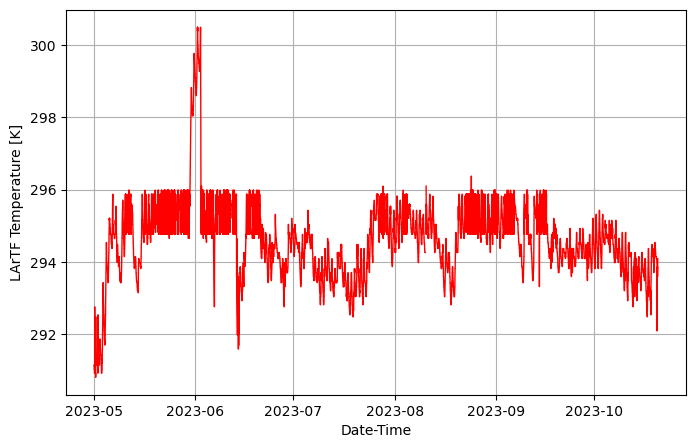

In [16]:
plt.figure(figsize=(8,5))

plt.plot(df_LArTF['date-time'],df_LArTF['temp'],'-r',lw=1)
plt.grid()
plt.xlabel('Date-Time')
# plt.xticks(rotation=70)
plt.ylabel('LArTF Temperature [K]')
plt.show()

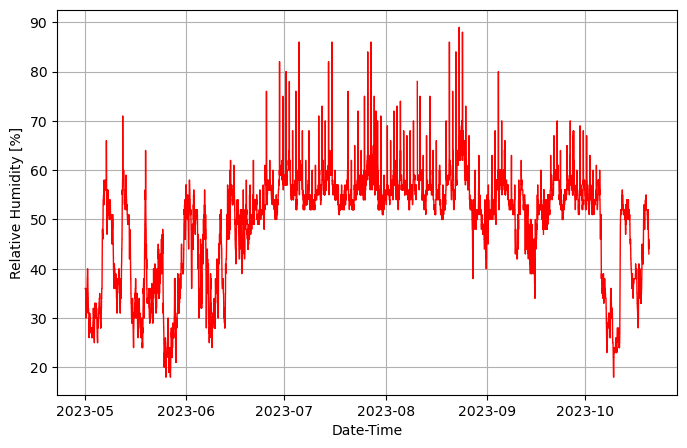

In [17]:

plt.figure(figsize=(8,5))

plt.plot(df_LArTF['date-time'],df_LArTF['humidity'],'-r',lw=1)
plt.grid()
plt.xlabel('Date-Time')
# plt.xticks(rotation=70)
plt.ylabel('Relative Humidity [%]')
plt.show()

CORRELATION ANALYSIS 

I 'GROUP' THE DATASETS 'BY' THEIR DATE-TIME data using python 'merge'

In [18]:
#resizing resistance and temperature data to match each other

df_merged_level_cryo_temp=pd.merge_asof(df_level, df_cryo_temp,on="date-time")
df_merged_level_cryo_temp_res = pd.merge_asof(df_resistance, df_merged_level_cryo_temp,on="date-time")
df_merged_level_cryo_temp_res['date-time'] = df_merged_level_cryo_temp_res['date-time'].dt.tz_localize('US/Central')
df_LArTF['date-time'] = df_LArTF['date-time'].dt.tz_convert('US/Central')
# df_merged_LArTF_res=pd.merge_asof(df_resistance, df_LArTF, on="date-time")
df_merged_all=pd.merge_asof(df_merged_level_cryo_temp_res,df_LArTF, on="date-time")


FIRST I WANT TO CHECK IF THE VARIABLES ARE NORMALLY DISTRIBUTED OR NOT

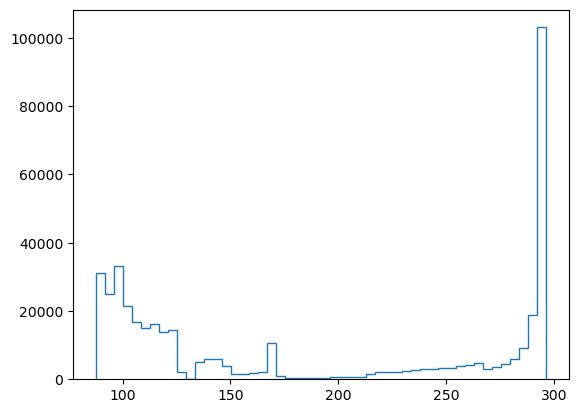

In [19]:
plt.hist(df_merged_level_cryo_temp['UBOONE_TE183_F_CV'],bins=50,histtype='step')
plt.show()


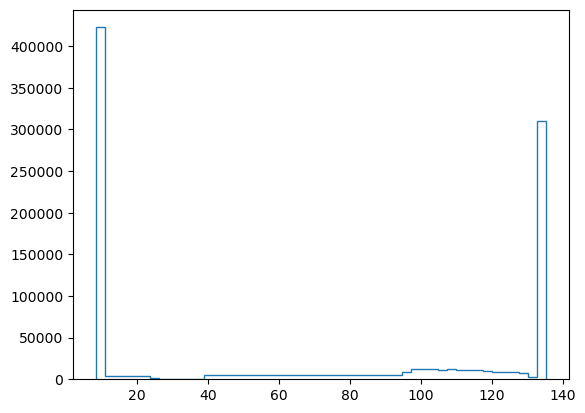

In [20]:
plt.hist(df_merged_level_cryo_temp['UBOONE_LT124_F_CV'],bins=50,histtype='step')
plt.show()


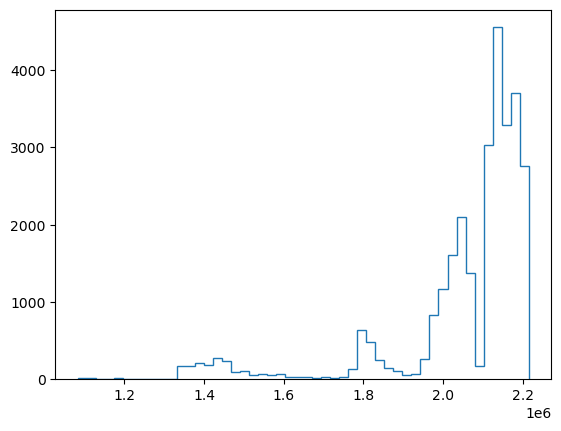

In [21]:
plt.hist(df_merged_level_cryo_temp_res['avg_res'],bins=50,histtype='step')
plt.show()


IT SEEMS THAT NONE OF THE VARIABLES OF INTEREST ARE NORMALLY DISTRBUTED, IN WHICH CASE I CHOSE TO GO WITH THE SPEARMAN CORRELATON.
(Note: Even though all correlations have been shown, the correlaton of interest is Spearman.)

CORRELATION BETWEEN CRYOSTAT TEMPERATURE AND LAr LEVEL

In [22]:
#PEARSON CORRELATION
df_merged_level_cryo_temp_new=df_merged_level_cryo_temp.dropna()
stats.pearsonr(df_merged_level_cryo_temp_new['UBOONE_TE183_F_CV'],df_merged_level_cryo_temp_new['UBOONE_LT124_F_CV'])

PearsonRResult(statistic=-0.8639274020722855, pvalue=0.0)

In [23]:
#SPEARMAN CORRELATION
stats.spearmanr(df_merged_level_cryo_temp_new['UBOONE_TE183_F_CV'],df_merged_level_cryo_temp_new['UBOONE_LT124_F_CV'])

SignificanceResult(statistic=-0.9756245614988294, pvalue=0.0)

In [24]:
#KENDALL TAU CORRELATION
stats.kendalltau(df_merged_level_cryo_temp_new['UBOONE_TE183_F_CV'],df_merged_level_cryo_temp_new['UBOONE_LT124_F_CV'])

SignificanceResult(statistic=-0.9036440084804547, pvalue=0.0)

CORRELATION BETWEEN RESISTANCE AND CRYOSTAT TEMP

In [25]:
df_merged_level_cryo_temp_res_new=df_merged_level_cryo_temp_res.dropna()

In [26]:
#PEARSON CORRELATION
stats.pearsonr(df_merged_level_cryo_temp_res_new['UBOONE_TE183_F_CV'],df_merged_level_cryo_temp_res_new['avg_res'])

PearsonRResult(statistic=-0.9851074767157686, pvalue=0.0)

In [27]:
#SPEARMAN CORRELATION
stats.spearmanr(df_merged_level_cryo_temp_res_new['UBOONE_TE183_F_CV'],df_merged_level_cryo_temp_res_new['avg_res'])

SignificanceResult(statistic=-0.9466998241469541, pvalue=0.0)

In [28]:
#KENDALL TAU CORRELATION
stats.kendalltau(df_merged_level_cryo_temp_res_new['UBOONE_TE183_F_CV'],df_merged_level_cryo_temp_res_new['avg_res'])

SignificanceResult(statistic=-0.8396903244188303, pvalue=0.0)

CORRELATION BETWEEN RESISTANCE AND LAr LEVEL

In [29]:
#PEARSON CORRELATION
stats.pearsonr(df_merged_level_cryo_temp_res_new['UBOONE_LT124_F_CV'],df_merged_level_cryo_temp_res_new['avg_res'])

PearsonRResult(statistic=0.756096780829324, pvalue=0.0)

In [30]:
#SPEARMAN CORRELATION
stats.spearmanr(df_merged_level_cryo_temp_res_new['UBOONE_LT124_F_CV'],df_merged_level_cryo_temp_res_new['avg_res'])

SignificanceResult(statistic=0.9315016011989438, pvalue=0.0)

In [31]:
#KENDALL TAU CORRELATION
stats.kendalltau(df_merged_level_cryo_temp_res_new['UBOONE_LT124_F_CV'],df_merged_level_cryo_temp_res_new['avg_res'])

SignificanceResult(statistic=0.827853531365256, pvalue=0.0)

RESISTANCE AND LArTF TEMPERATURE CORRELATION

In [32]:
df_merged_all_new=df_merged_all.dropna()
stats.pearsonr(df_merged_all_new['temp'],df_merged_all_new['avg_res'])


PearsonRResult(statistic=-0.06407074669214467, pvalue=2.9904363415987503e-16)

In [33]:
stats.spearmanr(df_merged_all_new['temp'],df_merged_all_new['avg_res'])


SignificanceResult(statistic=0.10157001888516488, pvalue=1.6335240949056907e-38)

In [34]:
stats.kendalltau(df_merged_all_new['temp'],df_merged_all_new['avg_res'])


SignificanceResult(statistic=0.0631404032396849, pvalue=1.625813987762691e-32)

RESISTANCE AND LArTF HUMIDITY CORRELATION

In [35]:
stats.pearsonr(df_merged_all_new['humidity'],df_merged_all_new['avg_res'])


PearsonRResult(statistic=-0.4681640358085707, pvalue=0.0)

In [36]:
stats.kendalltau(df_merged_all_new['humidity'],df_merged_all_new['avg_res'])


SignificanceResult(statistic=-0.5460235971451501, pvalue=0.0)

In [37]:
stats.spearmanr(df_merged_all_new['humidity'],df_merged_all_new['avg_res'])


SignificanceResult(statistic=-0.736716978246909, pvalue=0.0)